In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from utils.metrics import performance

In [2]:
test_dir = 'dataset/Kather_texture_2016_image_tiles_5000/test'

In [3]:
# Define image parameters
image_size = (150, 150)
batch_size = 32
num_classes = 8

In [4]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [5]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    class_mode='categorical',  # For multiclass classification
    shuffle=False
)

Found 504 images belonging to 8 classes.


Loading saved models

In [6]:
alexnet = tf.keras.models.load_model('savedModels/AlexNet.keras')

/Users/karthik/Desktop/UROP/Code/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [7]:
googlenet = tf.keras.models.load_model('savedModels/GoogleNet.keras')

In [8]:
resnet = tf.keras.models.load_model('savedModels/ResNet.keras')

In [9]:
mobilenet = tf.keras.models.load_model('savedModels/MobileNet.keras')

/Users/karthik/Desktop/UROP/Code/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 172 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [10]:
squeezenet = tf.keras.models.load_model('savedModels/SqueezeNet.keras')

In [11]:
models = [alexnet, googlenet, resnet, mobilenet, squeezenet]

Max of Max

In [43]:
def max_of_max(data, model_list):
    pred_values = []
    max_values = []
    
    # Get predictions and maximum values for each model
    for model in model_list:
        softmax_output = model.predict(data)
        pred_values.append(softmax_output[0])
        max_values.append(np.max(softmax_output))
    
    # Find the index of the maximum value among all maximum values
    predicted_model_index = max_values.index(max(max_values))
    
    # Find the index of the maximum value in the predictions of the selected model
    predicted_value_index = np.argmax(pred_values[predicted_model_index])

    
    return predicted_value_index

In [45]:
def max_of_max_2(data, model_list):
    pred_values = []
    max_values = [0] * 8

    # Get predictions and maximum values for each model
    for model in model_list:
        softmax_output = model.predict(data)
        pred_values.append(softmax_output[0])

    for j in range(len(pred_values[0])):
        for i in range(len(pred_values)):
            max_values[j] = max(max_values[j], pred_values[i][j])

    # Find the index of the maximum value among all maximum values
    predicted_model_index = np.argmax(max_values)
    return predicted_model_index


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[0.27259114 0.10443082 0.28862473 0.18947624 0.01228542 0.13131973
 0.00059303 0.0006789 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[9.9955124e-01 2.5862912e-08 4.9669965e-05 2.3674429e-05 6.5835298e-10
 3.7528650e-04 1.5093495e-09 2.0614985e-09]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[9.9999213e-01 2.1471145e-09 7.7248233e-06 1.7766457e-07 1.4091303e-09
 1.0273580e-08 4.6991098e-14 6.8845747e-14]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[9.9997103e-01 6.0163048e-15 2.9024732e-05 5.7097224e-14 1.1836338e-13
 9.8806942e-14 1.1211621e-16 4.6675337e-17]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[9.9999988e-01 4.9312884e-22 1.0083854e-07 7.0519288e-21 2.5660902e-21
 2.8082474e-18 3.3801577e-22 1.8143540e-23]
[0.9999999, 0.10443082, 0.28862473, 0.18947624, 0.012285417, 0.13131973, 0.00059303414, 0.00067889557]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[7.3185289e-01 2.3375701e-03 6.2319920e-03 2.5943702e-01 5.1675674e-05
 8.8837223e-05 1.2151482e-08 3.6197029e-08]


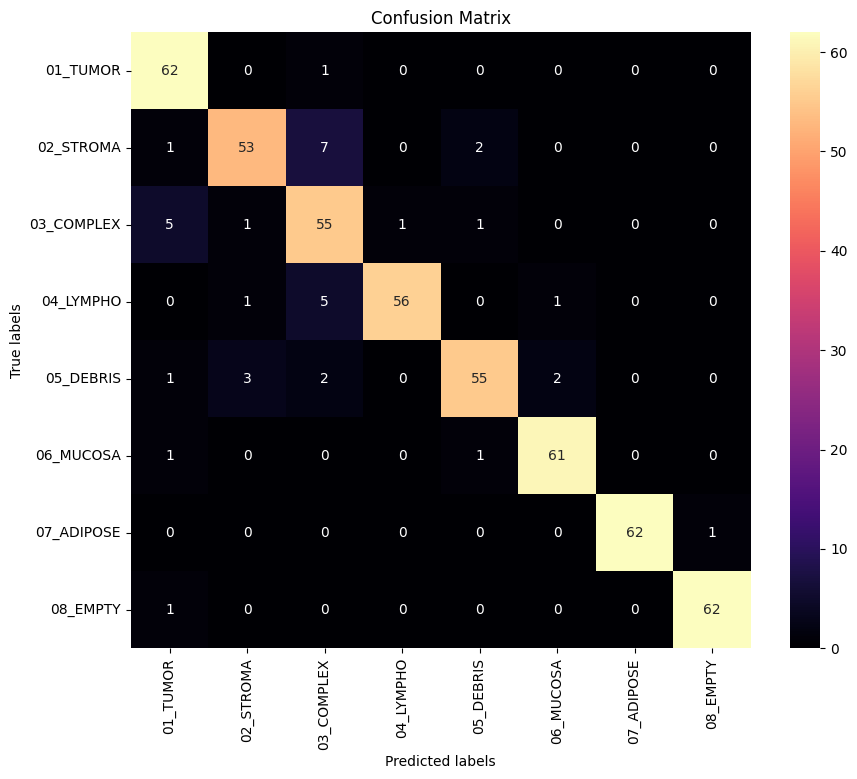

In [47]:
performance(test_generator,models,max_of_max_2)

Max of Min

In [74]:
def max_of_min(data, model_list):
    pred_values = []
    min_values = []

    # Get predictions and maximum values for each model
    for model in model_list:
        softmax_output = model.predict(data)
        pred_values.append(softmax_output)
        min_values.append(np.min(softmax_output))

    # Find the index of the maximum value among all maximum values
    predicted_model_index = min_values.index(max(min_values))

    # Find the index of the maximum value in the predictions of the selected model
    predicted_value_index = np.argmax(pred_values[predicted_model_index])

    # Return the predicted value and model name as a tuple
    return predicted_value_index

In [48]:
def max_of_min_2(data, model_list):
    pred_values = []
    min_values = [1] * 8

    # Get predictions and maximum values for each model
    for model in model_list:
        softmax_output = model.predict(data)
        pred_values.append(softmax_output[0])

    for j in range(len(pred_values[0])):
        for i in range(len(pred_values)):
            min_values[j] = min(min_values[j], pred_values[i][j])

    # Find the index of the maximum value among all maximum values
    predicted_model_index = np.argmax(min_values)

    return predicted_model_index


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━

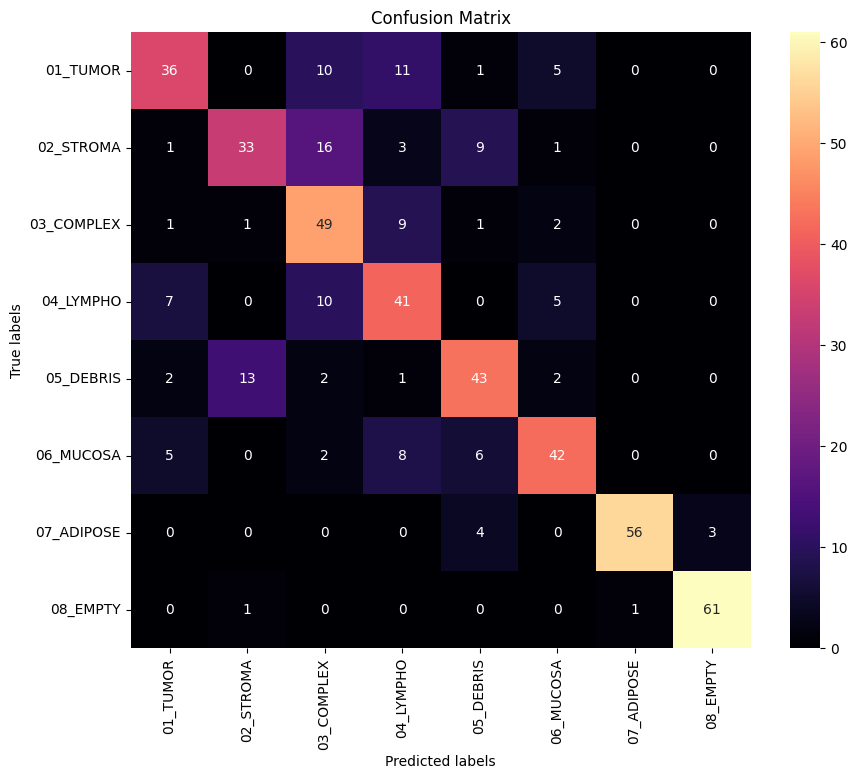

In [88]:
performance(test_generator,models,max_of_min)

Average

In [77]:
def max_of_average(data, model_list):
    pred_values = []
    average_values = []
    # Get predictions and maximum values for each model
    for model in model_list:
        softmax_output = model.predict(data)
        print(softmax_output[0])
        pred_values.append(softmax_output[0])

    for j in range(len(pred_values[0])):
        tsum = 0
        for i in range(len(pred_values)):
            tsum += pred_values[i][j]
        average_values.append(tsum/len(pred_values))

    print(average_values)
    # Find the index of the maximum value in the predictions of the selected model
    predicted_value_index = np.argmax(average_values)

    # Return the predicted value and model name as a tuple
    return predicted_value_index

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
[0.27259114 0.10443082 0.28862473 0.18947624 0.01228542 0.13131973
 0.00059303 0.0006789 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
[9.9955124e-01 2.5862912e-08 4.9669965e-05 2.3674429e-05 6.5835298e-10
 3.7528650e-04 1.5093495e-09 2.0614985e-09]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
[9.9999213e-01 2.1471145e-09 7.7248233e-06 1.7766457e-07 1.4091303e-09
 1.0273580e-08 4.6991098e-14 6.8845747e-14]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[9.9997103e-01 6.0163048e-15 2.9024732e-05 5.7097224e-14 1.1836338e-13
 9.8806942e-14 1.1211621e-16 4.6675337e-17]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[9.9999988e-01 4.9312884e-22 1.0083854e-07 7.0519288e-21 2.5660902e-21
 2.8082474e-18 3.3801577e-22 1.8143540e-23]
[0.8544210851192474, 0.020886169015531093, 0.05774225080897821, 0.03790001775893477, 0.002457083802683338, 0.02633900564979368, 0.00011860713049812217, 0.00013577952535658364]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[7.3185289e-01 2.3375701e-03 6.2319920e-03

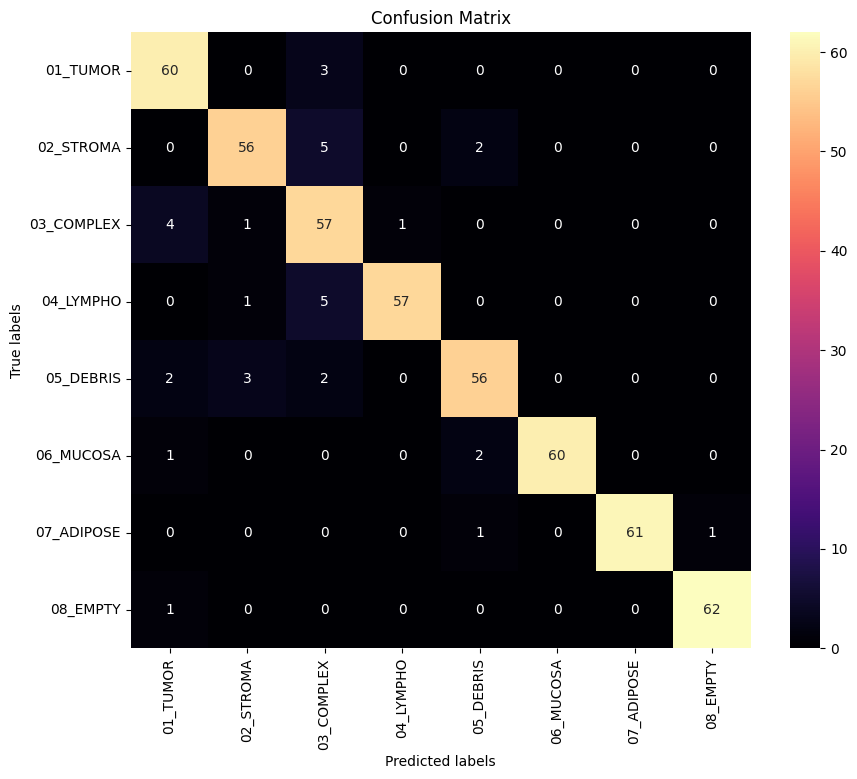

In [78]:
performance(test_generator,models,max_of_average)

Product

In [79]:
def max_of_product(data, model_list):
    pred_values = []
    product_values = []
    # Get predictions and maximum values for each model
    for model in model_list:
        softmax_output = model.predict(data)
        print(softmax_output[0])
        pred_values.append(softmax_output[0])

    for j in range(len(pred_values[0])):
        tsum = 1
        for i in range(len(pred_values)):
            tsum *= pred_values[i][j]
        product_values.append(tsum)

    print(product_values)
    # Find the index of the maximum value in the predictions of the selected model
    predicted_value_index = np.argmax(product_values)

    # Return the predicted value and model name as a tuple
    return predicted_value_index

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
[0.27259114 0.10443082 0.28862473 0.18947624 0.01228542 0.13131973
 0.00059303 0.0006789 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
[9.9955124e-01 2.5862912e-08 4.9669965e-05 2.3674429e-05 6.5835298e-10
 3.7528650e-04 1.5093495e-09 2.0614985e-09]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
[9.9999213e-01 2.1471145e-09 7.7248233e-06 1.7766457e-07 1.4091303e-09
 1.0273580e-08 4.6991098e-14 6.8845747e-14]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[9.9997103e-01 6.0163048e-15 2.9024732e-05 5.7097224e-14 1.1836338e-13
 9.8806942e-14 1.1211621e-16 4.6675337e-17]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[9.9999988e-01 4.9312884e-22 1.0083854e-07 7.0519288e-21 2.5660902e-21
 2.8082474e-18 3.3801577e-22 1.8143540e-23]
[0.27245874593702873, 1.7204875296665035e-53, 3.24123647958402e-22, 3.2089135334616882e-46, 3.461697559245732e-54, 1.404874614723211e-43, 1.5940078674824378e-63, 8.159670420212856e-65]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[7.3185289e-01 2.3375701e-03 6.23

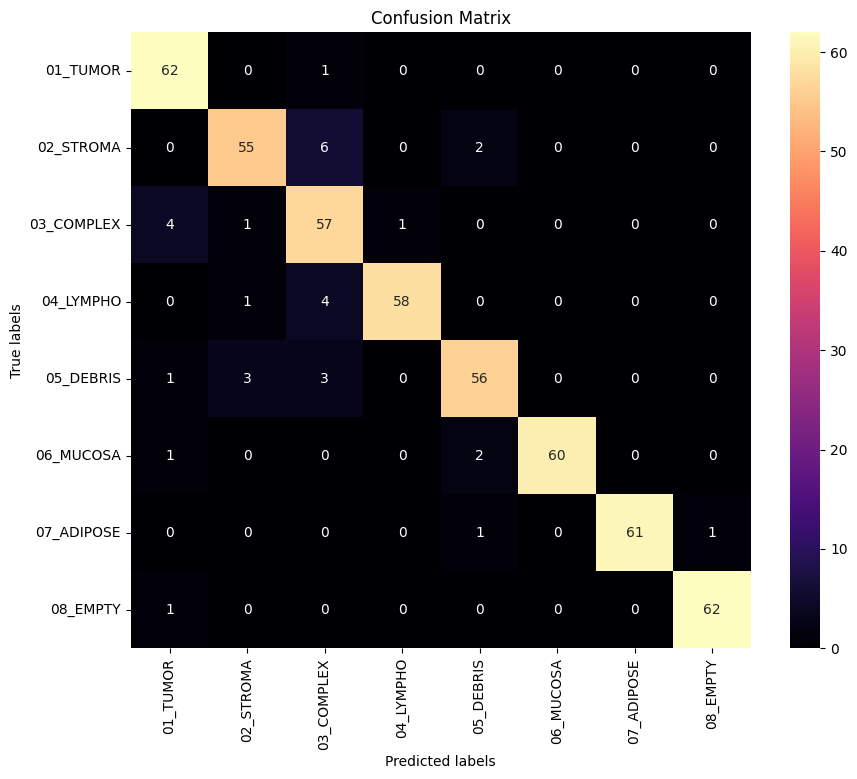

In [80]:
performance(test_generator,models,max_of_product)

Major Voting

In [66]:
from collections import Counter

In [84]:
def value_with_max_frequency(arr):
    # Count the frequency of each element in the array
    freq_counter = Counter(arr)
    
    # Find the maximum frequency
    max_freq = max(freq_counter.values())
    
    # Find the element(s) with the maximum frequency
    max_freq_elements = [key for key, value in freq_counter.items() if value == max_freq]
    
    return max_freq_elements


In [12]:
def major_voting(data, model_list):
    pred_values = []
    # Get predictions and maximum values for each model
    for model in model_list:
        softmax_output = model.predict(data)
        pred_values.append(np.argmax(softmax_output[0]))
        
    # Return the predicted value and model name as a tuple
    return value_with_max_frequency(pred_values)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━

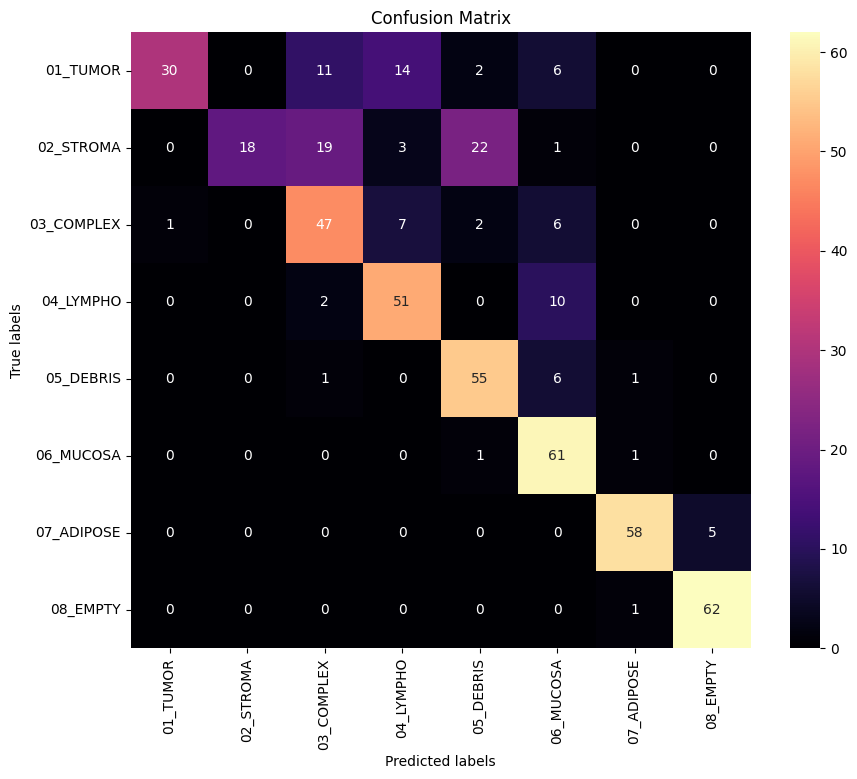

In [13]:
performance(test_generator,models,major_voting)